In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
import pandas as pd
from keras.datasets import mnist #mnist 데이터셋
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # 학습 과정 loss와 acc 시각화

In [3]:
# 1. 데이터셋
width, height = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

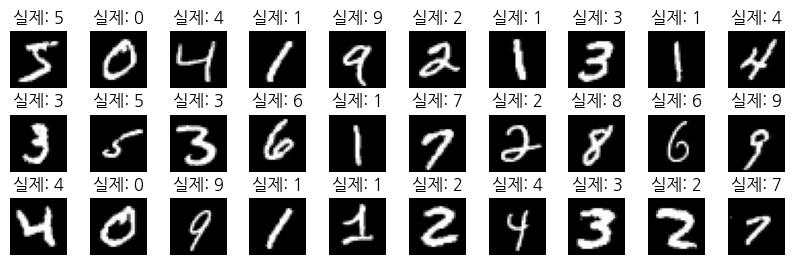

In [9]:
plt_row = 3
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col, plt_row]  # 그래프 크기 설정
#plt.rc('font', family='Malgun Gothic')  #window에서 한글 시각화
plt.rc('font', family='NanumGothic')  # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
for i in range(plt_row * plt_col):
    subax = axes[i // plt_col, i % plt_col]
    subax.imshow(X_train[i].reshape(width, height), cmap='gray')
    subax.axis('off')
    subax.set_title('실제: {}'.format(y_train[i]))
# axes[0,0].imshow(X_test[0].reshape(width, height))
# axes[0,0].axis('off')
# axes[0,0].set_title('실제: {}'.format(y_test[0]))

# 1. DNN

In [ ]:
# 1. 데이터 생성 및 전처리
width, height = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 28,28 => 784 1차원 -> 실수형변환 -> 스케일조정
X_train = X_train.reshape(-1, width * height).astype('float32') / 255.0
X_val = X_val.reshape(-1, width * height).astype('float32') / 255.0
X_test = X_test.reshape(-1, width * height).astype('float32') / 255.0
# 종속변수 원-핫 인코딩
Y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(width * height,)))  # 입력층
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# 3. 모델 학습 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 4. 모델 학습
history = model.fit(X_train, Y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)


Epoch 1/50
391/391 [==============================] - 4s 9ms/step - loss: 0.3215 - accuracy: 0.9019 - val_loss: 0.1177 - val_accuracy: 0.9650
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 0.1230 - accuracy: 0.9628 - val_loss: 0.0892 - val_accuracy: 0.9705
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0893 - accuracy: 0.9719 - val_loss: 0.0818 - val_accuracy: 0.9768
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0714 - accuracy: 0.9773 - val_loss: 0.0770 - val_accuracy: 0.9780
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.0790 - val_accuracy: 0.9768
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0818 - val_accuracy: 0.9792
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0807 - val_accuracy: 0.9784
Epoch

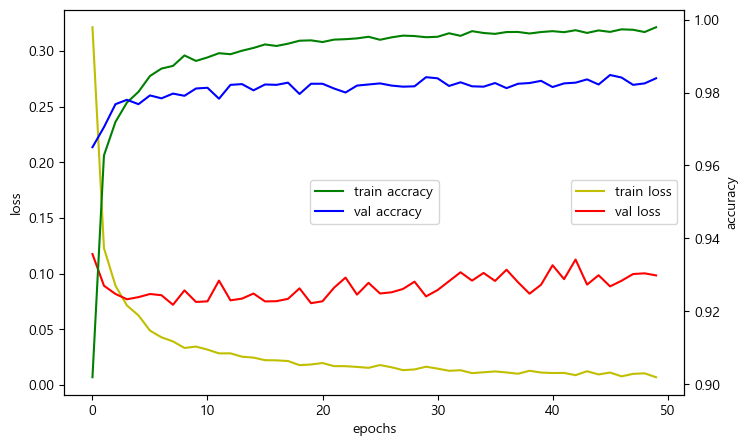

In [ ]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(history.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(history.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')


In [ ]:
# 혼돈행렬
from sklearn.metrics import confusion_matrix
y_hat = model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, y_hat)
pd.crosstab(y_test, y_hat, rownames=['실제'], colnames=['예측'])

313/313 [==============================] - 1s 3ms/step


예측,0,1,2,3,4,5,6,7,8,9
실제,,,,,,,,,,
0,973,1,0,1,0,0,2,1,2,0
1,0,1132,0,0,0,0,2,1,0,0
2,3,1,1014,2,1,0,1,7,3,0
3,1,0,2,988,0,8,0,4,2,5
4,0,1,0,0,962,0,5,1,2,11
5,2,0,0,3,1,881,3,0,2,0
6,2,2,0,1,4,4,943,0,2,0
7,2,3,5,1,0,0,0,1012,2,3
8,2,1,2,4,1,7,2,4,948,3


In [ ]:
# 실제값과 예측값이 다른 갯수(방법1)
cnt = 0
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i != j:
            cnt += data
print('실제값과 예측값이 다른 갯수:', cnt)


실제값과 예측값이 다른 갯수: 155


In [ ]:
cnt =0
for y,h in zip(y_test, y_hat):
    if y!=h:
        cnt += 1
print('실제값과 예측값이 다른 갯수:', cnt)

실제값과 예측값이 다른 갯수: 155


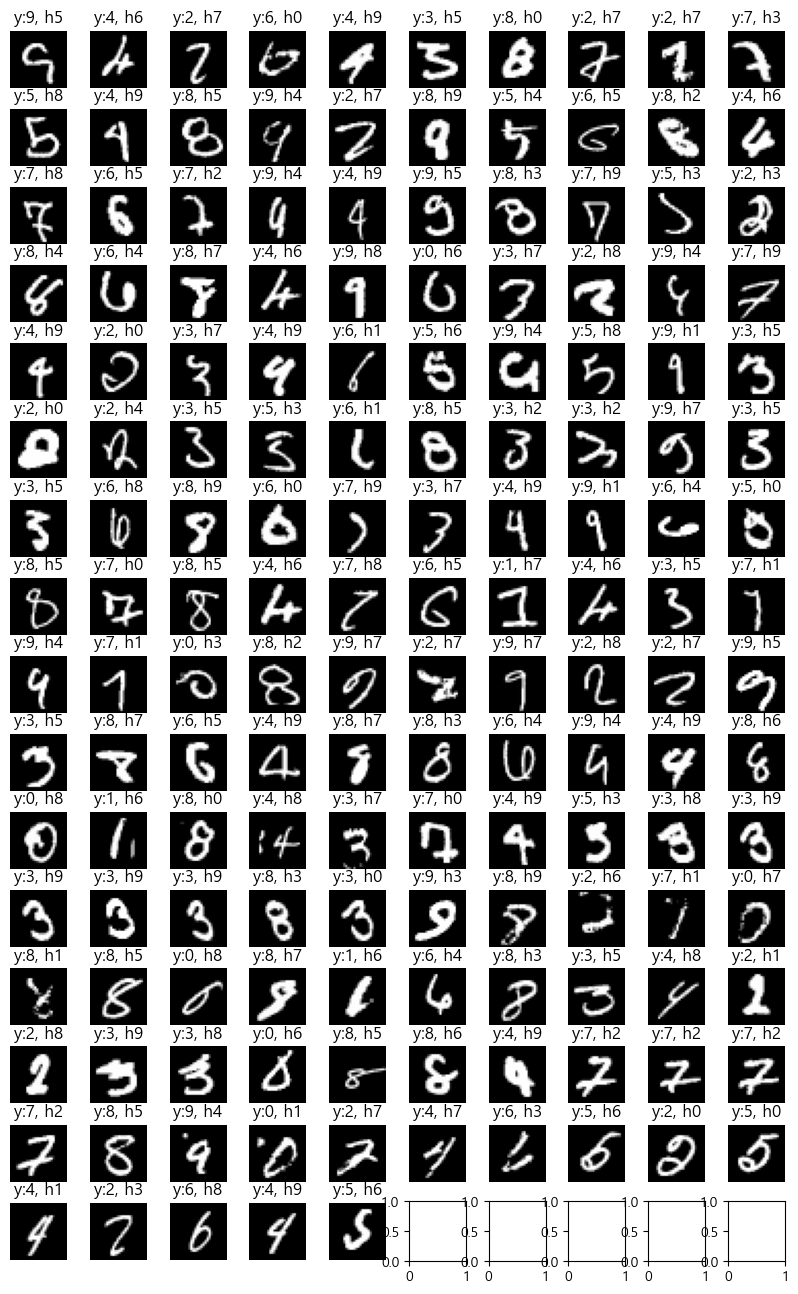

In [ ]:
plt_row = 16
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col, plt_row]  # 그래프 크기 설정
plt.rc('font', family='Malgun Gothic')  #window에서 한글 시각화
#plt.rc('font', family='NanumGothic')  # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
i=0 # yhat[i], y_test의 인덱스 -> yhat[i], y_test를 비교
cnt = 0 # 이미지 출력횟수
while (i<len(y_test)) & (cnt < plt_row * plt_col):
    if y_hat[i] == y_test[i]:
        i += 1
        continue
    subax = axes[cnt // plt_col, cnt % plt_col]
    subax.imshow(X_test[i].reshape(width, height), cmap='gray')
    subax.axis('off')
    subax.set_title('y:{}, h{}'.format(y_test[i], y_hat[i]))
    i += 1
    cnt += 1

# CNN(컨볼루션 레이어 포함) - 교안 31page

In [12]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [17]:
# 1. 데이터 생성 및 전처리
width, height = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 28,28 => 784 1차원 -> 실수형변환 -> 스케일조정
X_train = X_train.reshape(-1, width , height).astype('float32') / 255.0
X_val = X_val.reshape(-1, width , height).astype('float32') / 255.0
X_test = X_test.reshape(-1, width , height).astype('float32') / 255.0
# 종속변수 원-핫 인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [41]:
# 2. 모델생성
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',  # zero-padding을 하면 추력사이즈도 동일
                 activation='relu',
                 input_shape=(width, height, 1))) # 입력채널1개, 필터32 => 28*28*32채널 출력
model.add(MaxPooling2D(pool_size=(2,2))) # => 14*14*32
model.add(Dropout(0.1))
model.add(Conv2D(64, (3,3), activation='relu')) # => 12*12*64채널 출력, zero-padding이 아니라 크기가 줄어들었음
model.add(MaxPooling2D(pool_size=(2,2))) # => 6*6*64
model.add(Dropout(0.25))
model.add(Flatten())  # 입력을 1차원으로
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()
# 320 => 3x3필터가 weight (9+1(bias))*32개 필터
# 18496 => ((3*3*32) + 1(bias))*64개 필터

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# 3. 학습설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습
elarlyStopping = EarlyStopping(monitor='val_loss', patience=20)
hist = model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_data=(X_val, Y_val), verbose=1, callbacks=[elarlyStopping])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7489 - loss: 0.7589 - val_accuracy: 0.9773 - val_loss: 0.0764
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9581 - loss: 0.1394 - val_accuracy: 0.9850 - val_loss: 0.0519
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9698 - loss: 0.1024 - val_accuracy: 0.9872 - val_loss: 0.0451
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9756 - loss: 0.0779 - val_accuracy: 0.9876 - val_loss: 0.0437
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9797 - loss: 0.0657 - val_accuracy: 0.9880 - val_loss: 0.0401
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9817 - loss: 0.0568 - val_accuracy: 0.9904 - val_loss: 0.0344
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9831 - loss: 0.0557 - val_accuracy: 0.9910 - val_loss: 0.0344
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9846 - loss: 0.0489 - val_accuracy: 0

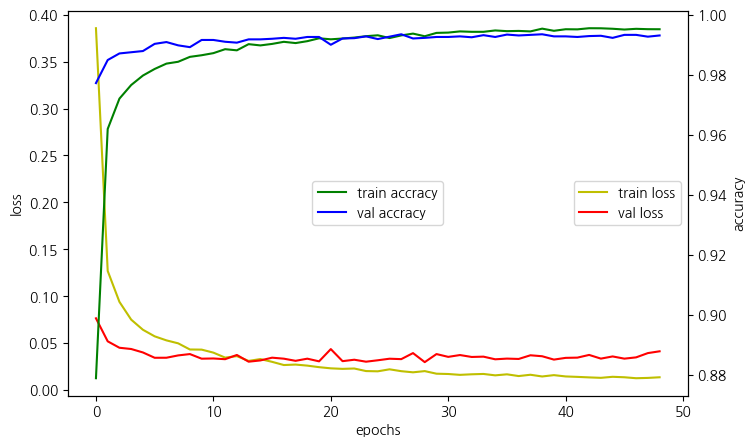

In [43]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')


In [44]:
# 모델 평가
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0351


[0.028520608320832253, 0.9937999844551086]

In [45]:
print('실제값 :',y_test)
yhat = np.argmax(model.predict(X_test), axis=1)
print('예측값 :',yhat)

실제값 : [7 2 1 ... 4 5 6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
예측값 : [7 2 1 ... 4 5 6]


In [46]:
cmatrix = confusion_matrix(y_test, yhat)
pd.crosstab(y_test, yhat, rownames=['실제'], colnames=['예측'])


예측,0,1,2,3,4,5,6,7,8,9
실제,,,,,,,,,,
0,979,0,0,0,0,0,0,1,0,0
1,0,1131,0,0,0,1,1,2,0,0
2,1,0,1023,0,0,0,1,7,0,0
3,0,0,1,1008,0,1,0,0,0,0
4,0,0,0,0,975,0,1,2,0,4
5,1,0,0,7,0,883,1,0,0,0
6,2,1,1,0,1,1,952,0,0,0
7,0,1,0,1,0,0,0,1026,0,0
8,4,0,1,1,1,0,0,0,965,2


In [47]:
# 실제값과 예측값이 다른 갯수
cnt = 0
for i in range(len(y_test)):
  if y_test[i] != yhat[i]:
    cnt += 1
print(cnt)

62


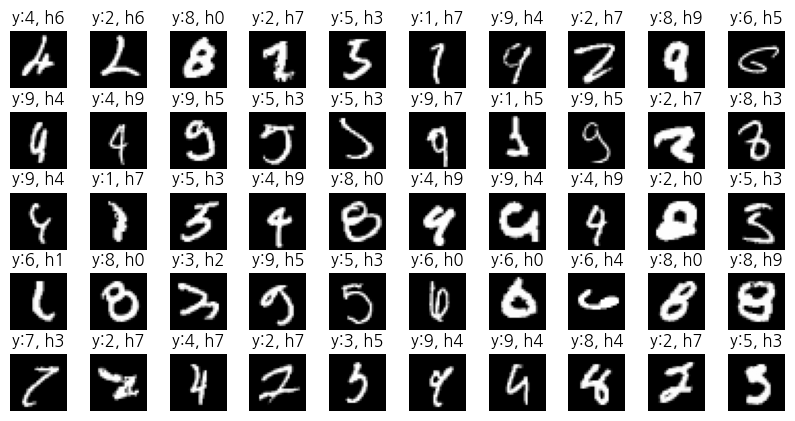

In [48]:
plt_row = 5
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col, plt_row]  # 그래프 크기 설정
plt.rc('font', family='NanumGothic')  # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
i=0 # yhat[i], y_test의 인덱스 -> yhat[i], y_test를 비교
cnt = 0 # 이미지 출력횟수
while (i<len(y_test)) & (cnt < plt_row * plt_col):
    if yhat[i] == y_test[i]:
        i += 1
        continue
    subax = axes[cnt // plt_col, cnt % plt_col]
    subax.imshow(X_test[i].reshape(width, height), cmap='gray')
    subax.axis('off')
    subax.set_title('y:{}, h{}'.format(y_test[i], yhat[i]))
    i += 1
    cnt += 1

In [49]:
model.save('/content/drive/MyDrive/MBC아카데미/model/mnist_model(CNN).h5')

Mounted at /content/drive
